In [2]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.membership as mf
import matplotlib.pyplot as plt

%matplotlib inline

ModuleNotFoundError: No module named 'skfuzzy'

Berikut adalah langkah-langkah utama yang terdapat pada Logika Fuzzy.

<img src="img/fuzzy_step.png" alt="Drawing" width= 1000px;/>

sumber: [https://www.youtube.com/watch?v=RjyRTBNk3w8&t=8s](https://www.youtube.com/watch?v=RjyRTBNk3w8&t=8s)

Sistem fuzzy logic memetakan ruang input menuju ruang output menggunakan logika fuzzy.

+ **Input**: Data yang menggambarkan sebuah kondisi yang selanjutnya bertujuan untuk disimpulkan atau dianalisa menggunakan Logika Fuzzy yang menerapkan sistem pakar berbasis rule atau *rule based system*.
+ **Knowledge Base**: Kumpulan aturan atau rule dalam bentuk pernyataan if-then yang membentuk sebuah sistem pakar. 
+ **Fuzzification**: Proses mengubah input sistem yang memiliki value berupa angka menjadi sebuah sebuah value *fuzzy* yang bersifat linguistik berdasarkan fungsi keanggotaan atau *membership* dan disimpan dalam **_Knowledge Base_**.
+ **Inferensi**: Proses mengubah input fuzzy menjadi output fuzzy dengan cara mengikuti aturan (if-then) atau rule based system yang telah ditetapkan sebelumnya pada **_Knowledge Base_** yang rule tersebut mengacu pada kepakaran dari pembuat program.
+ **Defuzzification**: Proses mengubah hasil dari tahap inferensi menjadi output yang dianggap sebagai kesimpulan dari pakar berdasarkan fungsi keanggotaan yang telah ditetapkan.
+ **Output**: Kesimpulan yang merepresentasikan jawaban dari pakar.

Pada pertemuan ini kita akan membahas tentang 3 metode fuzzy logic:
+ Mamdani
+ Sugeno
+ Tsukamoto (Tugas)

Perbedaan dari ketiga metode tersebut adalah sebagai berikut:

<img src="img/fuzzy_method.png" alt="Drawing" width= 1000px;/>

sumber: [https://www.youtube.com/watch?v=RjyRTBNk3w8&t=8s](https://www.youtube.com/watch?v=RjyRTBNk3w8&t=8s)

#### Set or Generate Matric Range Value

Buat range value yang menjatakan batas range dari metric atau ukuran value dari data tersebut.

In [2]:
x_age = np.arange(0, 101, 1)
x_blood_pressure = np.arange(0, 221, 1)
x_cholesterol = np.arange(100, 251, 1)
x_blood_sugar = np.arange(0, 121, 1)
x_hdl = np.arange(0, 71, 1)
x_ldl = np.arange(0, 191, 1)
y_risk = np.arange(0, 46, 1)

In [3]:
# print range dan batas metric setiap data
print(f"age from {x_age[0]} to {x_age[-1]}")
print(f"blood pressure from {x_blood_pressure[0]} to {x_blood_pressure[-1]}")
print(f"cholesterol from {x_cholesterol[0]} to {x_cholesterol[-1]}")
print(f"blood sugar from {x_blood_sugar[0]} to {x_blood_sugar[-1]}")
print(f"hdl from {x_hdl[0]} to {x_hdl[-1]}")
print(f"ldl from {x_ldl[0]} to {x_ldl[-1]}")
print(f"risk from {y_risk[0]} to {y_risk[-1]}")

age from 0 to 100
blood pressure from 0 to 220
cholesterol from 100 to 250
blood sugar from 0 to 120
hdl from 0 to 70
ldl from 0 to 190
risk from 0 to 45


#### User Condition Input

Buat data yang mengambarkan kondisi dari object yang ingin diketahui (misal: pasien untuk dilakukan pemeriksaan *Heart Disease Diagnosis*).

In [4]:
input_age = 40
input_blood_pressure =100
input_cholesterol = 180
input_blood_sugar = 160
input_ldl = 170
input_hdl = 60

#### Initialize and Visualize Knowledge Base by Range

Lakukan pembagian data `age` yang disesuaikan dengan bidang pakar dan visualisasikan. Bila dinyatakan dengan persamaan maka berikut adalah persamaan garis untuk membagi pengelompokan umur atau  `age`.
<br><br>

$$
\mu_{age} = \left\{\begin{matrix}
\mu_{young} = \left\{\begin{matrix}
0 & 0 \geq 40 \\ 
\frac{40 - x}{40-30} & 30 \leq x \leq 40 \\ 
1 & x \leq 30 
\end{matrix}\right. \\ 
\mu_{mid} = \left\{\begin{matrix}
0 & 0 \leq 30 \\ 
\frac{x - 30}{40-30} & 30 \leq x \leq 40 \\ 
\frac{60 - x}{60-50} & 50 \leq x \leq 60 \\ 
1 & 40 \leq x \leq 50 \\
0 & 0 \geq 60
\end{matrix}\right. \\ 
\mu_{old} = \left\{\begin{matrix}
0 & 0 \leq 50 \\ 
\frac{x - 60}{60-50} & 50 \leq x \leq 60 \\ 
1 & x \geq 60 
\end{matrix}\right.
\end{matrix}\right.
$$

In [5]:
age_young = mf.trapmf(x_age, [0, 0, 30, 40])
age_mid = mf.trapmf(x_age, [30, 40, 50, 60]) 
age_old = mf.trapmf(x_age, [50, 60, 100, 100])

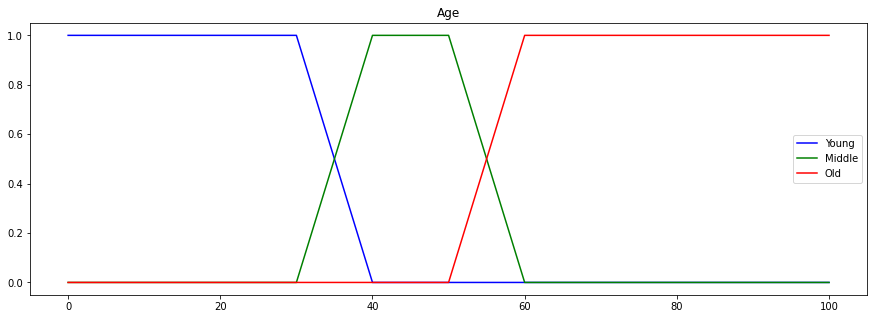

In [6]:
fig = plt.subplots(figsize=(15, 5))

plt.plot(x_age, age_young, 'b', linewidth=1.5, label='Young')
plt.plot(x_age, age_mid, 'g', linewidth=1.5, label='Middle')
plt.plot(x_age, age_old, 'r', linewidth=1.5, label='Old')
plt.title('Age')
plt.legend()

Lakukan pembagian data `blood_pressure` yang disesuaikan dengan bidang pakar dan visualisasikan.

In [7]:
blood_pressure_low = mf.trapmf(x_blood_pressure, [-30, -5, 100, 120])
blood_pressure_mid = mf.trapmf(x_blood_pressure, [100, 120, 140, 160])
blood_pressure_high = mf.trapmf(x_blood_pressure, [140, 160, 180, 200])
blood_pressure_very_high = mf.trapmf(x_blood_pressure, [180, 200, 220, 220])

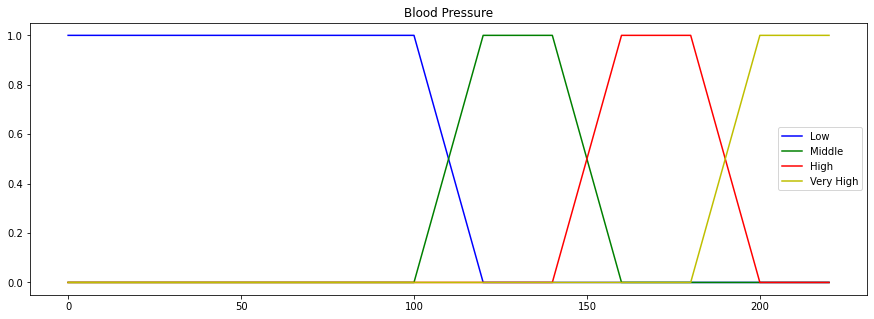

In [8]:
fig = plt.subplots(figsize=(15, 5))

plt.plot(x_blood_pressure, blood_pressure_low, 'b', linewidth=1.5, label='Low')
plt.plot(x_blood_pressure, blood_pressure_mid, 'g', linewidth=1.5, label='Middle')
plt.plot(x_blood_pressure, blood_pressure_high, 'r', linewidth=1.5, label='High')
plt.plot(x_blood_pressure, blood_pressure_very_high, 'y', linewidth=1.5, label='Very High')
plt.title('Blood Pressure')
plt.legend()

Lakukan pembagian data tingkat `cholesterol` yang disesuaikan dengan bidang pakar dan visualisasikan.

In [9]:
cholesterol_low = mf.trapmf(x_cholesterol, [-30, -5, 180, 200])
cholesterol_mid = mf.trapmf(x_cholesterol, [180, 200, 220, 240])
cholesterol_high = mf.trapmf(x_cholesterol, [220, 240, 250, 270])

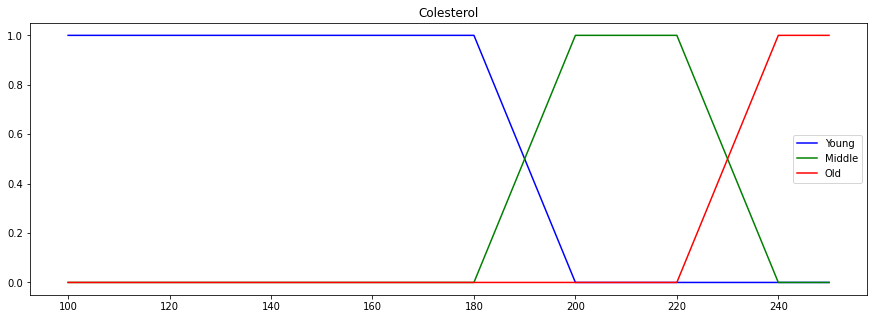

In [10]:
fig = plt.subplots(figsize=(15, 5))

plt.plot(x_cholesterol, cholesterol_low, 'b', linewidth=1.5, label='Young')
plt.plot(x_cholesterol, cholesterol_mid, 'g', linewidth=1.5, label='Middle')
plt.plot(x_cholesterol, cholesterol_high, 'r', linewidth=1.5, label='Old')
plt.title('Colesterol')
plt.legend()

Lakukan pembagian data tingkat `blood_sugar` atau gula darah yang disesuaikan dengan bidang pakar dan visualisasikan.

In [11]:
blood_sugar_very_high = mf.trimf(x_blood_sugar, [90, 120, 130])

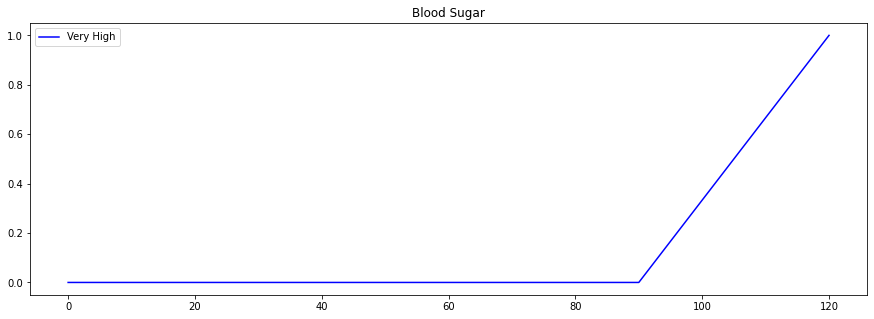

In [12]:
fig = plt.subplots(figsize=(15, 5))

plt.plot(x_blood_sugar, blood_sugar_very_high, 'b', linewidth=1.5, label='Very High')
plt.title('Blood Sugar')
plt.legend()

Lakukan pembagian data tingkat `ldl` atau kolesterol jahat (sumber: [https://bumame.com/blog/tips-kesehatan/apa-itu-ldl-kolesterol-jahat/](https://bumame.com/blog/tips-kesehatan/apa-itu-ldl-kolesterol-jahat/)) yang disesuaikan dengan bidang pakar dan visualisasikan.

In [13]:
ldl_normal= mf.trimf(x_ldl, [0, 0, 100,])
ldl_limit= mf.trimf(x_ldl, [100, 130, 160,])
ldl_high= mf.trimf(x_ldl, [130, 160, 190,])
ldl_very_high= mf.trapmf(x_ldl, [160, 190, 200, 200])

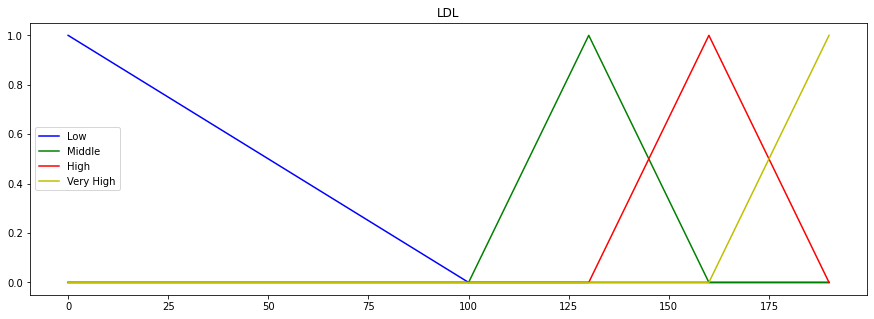

In [14]:
fig = plt.subplots(figsize=(15, 5))

plt.plot(x_ldl, ldl_normal, 'b', linewidth=1.5, label='Low')
plt.plot(x_ldl, ldl_limit, 'g', linewidth=1.5, label='Middle')
plt.plot(x_ldl, ldl_high, 'r', linewidth=1.5, label='High')
plt.plot(x_ldl, ldl_very_high, 'y', linewidth=1.5, label='Very High')
plt.title('LDL')
plt.legend()

Lakukan pembagian data tingkat `hdl` atau kolesterol baik (sumber: [https://www.alodokter.com/mengenal-hdl-kolesterol-baik-yang-penting-bagi-tubuh/](https://www.alodokter.com/mengenal-hdl-kolesterol-baik-yang-penting-bagi-tubuh/)) yang disesuaikan dengan bidang pakar dan visualisasikan.

In [15]:
hdl_low= mf.trapmf(x_hdl, [0, 0, 30, 40])
hdl_mid= mf.trapmf(x_hdl, [30, 40, 50, 60])
hdl_high= mf.trapmf(x_hdl, [50, 60, 80, 80])

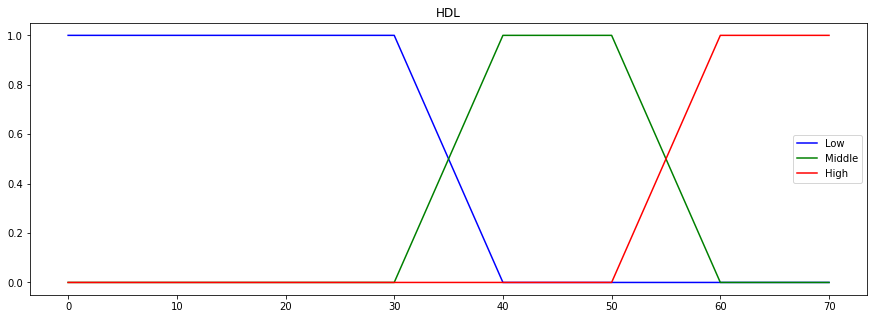

In [16]:
fig = plt.subplots(figsize=(15, 5))

plt.plot(x_hdl, hdl_low, 'b', linewidth=1.5, label='Low')
plt.plot(x_hdl, hdl_mid, 'g', linewidth=1.5, label='Middle')
plt.plot(x_hdl, hdl_high, 'r', linewidth=1.5, label='High')
plt.title('HDL')
plt.legend()

#### Hypotesis

Gunakan hasil diagnosa awal yang umumnya terjadi.

In [17]:
risk_not = mf.trapmf(y_risk, [0 ,0 ,5 ,10])
risk_little = mf.trapmf(y_risk, [5 ,10 ,15 ,20])
risk_mid = mf.trapmf(y_risk, [15 ,20 ,25 ,30])
risk_high = mf.trapmf(y_risk, [25 ,30 ,35 ,40])
risk_very_high = mf.trapmf(y_risk, [35, 40, 45, 50])

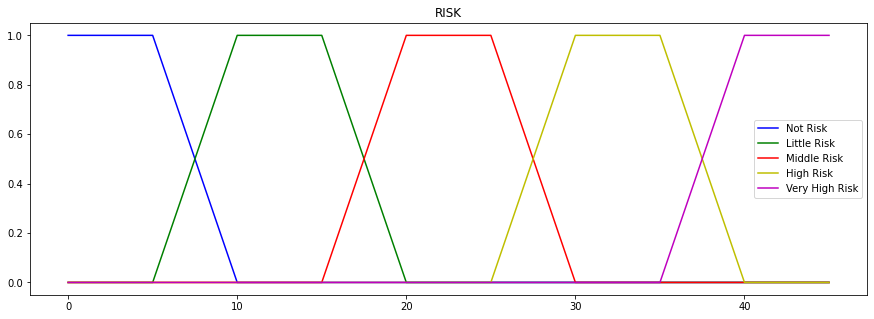

In [18]:
fig = plt.subplots(figsize=(15, 5))

plt.plot(y_risk, risk_not, 'b', linewidth=1.5, label='Not Risk')
plt.plot(y_risk, risk_little, 'g', linewidth=1.5, label='Little Risk')
plt.plot(y_risk, risk_mid, 'r', linewidth=1.5, label='Middle Risk')
plt.plot(y_risk, risk_high, 'y', linewidth=1.5, label='High Risk')
plt.plot(y_risk, risk_very_high, 'm', linewidth=1.5, label='Very High Risk')
plt.title('RISK')
plt.legend()

### **Fuzzification**

Mapping input dari variable yang berawalan dengan nama `input_` ke setiap range value yang berupa metric dan mencari range dari value pada variabel `input_` tersebut masuk ke range yang mana.

In [19]:
age_fit_young = fuzz.interp_membership(x_age, age_young, input_age)
age_fit_mid = fuzz.interp_membership(x_age, age_mid, input_age)
age_fit_old = fuzz.interp_membership(x_age, age_old, input_age)

blood_pressure_fit_low = fuzz.interp_membership(x_blood_pressure, blood_pressure_low, input_blood_pressure)
blood_pressure_fit_mid = fuzz.interp_membership(x_blood_pressure, blood_pressure_mid, input_blood_pressure)
blood_pressure_fit_high = fuzz.interp_membership(x_blood_pressure, blood_pressure_high , input_blood_pressure)
blood_pressure_fit_very_high = fuzz.interp_membership(x_blood_pressure, blood_pressure_very_high, input_blood_pressure)

cholesterol_fit_low = fuzz.interp_membership(x_cholesterol, cholesterol_low, input_cholesterol)
cholesterol_fit_mid = fuzz.interp_membership(x_cholesterol, cholesterol_mid, input_cholesterol)
cholesterol_fit_high = fuzz.interp_membership(x_cholesterol, cholesterol_high, input_cholesterol)

blood_sugar_fit_very_high = fuzz.interp_membership(x_blood_sugar, blood_sugar_very_high, input_blood_sugar)

ldl_fit_normal = fuzz.interp_membership(x_ldl, ldl_normal, input_ldl)
ldl_fit_limit = fuzz.interp_membership(x_ldl, ldl_limit, input_ldl)
ldl_fit_high = fuzz.interp_membership(x_ldl,ldl_high , input_ldl)
ldl_fit_very_high = fuzz.interp_membership(x_ldl, ldl_very_high, input_ldl)

hdl_fit_low = fuzz.interp_membership(x_hdl, hdl_low, input_hdl)
hdl_fit_mid = fuzz.interp_membership(x_hdl, hdl_mid, input_hdl)
hdl_fit_high = fuzz.interp_membership(x_hdl, hdl_high, input_hdl)

### **Inference**

Penerapan aturan yang dibuat berdasarkan Sistem Pakar (Pakar dalam case ini adalah Dokter).

<img src="https://miro.medium.com/v2/resize:fit:4800/format:webp/1*xefGIRf5GF0eRdDKnTqchw.png" alt="Drawing" width= 1200px;/>

In [20]:
rule1 = np.fmin(np.fmin(np.fmin(np.fmin(blood_pressure_fit_low ,cholesterol_fit_low),ldl_fit_normal), hdl_fit_high), risk_not)
rule2 = np.fmin(np.fmin(np.fmin(np.fmin(blood_pressure_fit_low ,cholesterol_fit_low),ldl_fit_limit), hdl_fit_high), risk_little) 
rule3 = np.fmin(np.fmin(np.fmin(np.fmin(blood_pressure_fit_low ,cholesterol_fit_low),ldl_fit_high), hdl_fit_high), risk_mid) 
rule4 = np.fmin(np.fmin(np.fmin(np.fmin(blood_pressure_fit_low ,cholesterol_fit_low),ldl_fit_very_high), hdl_fit_high), risk_high) 
rule5 = np.fmin(np.fmin(np.fmin(blood_pressure_fit_mid ,cholesterol_fit_low), hdl_fit_high), risk_not) 

rule6 = np.fmin(np.fmin(np.fmin(age_fit_young, blood_pressure_fit_mid), cholesterol_fit_mid), risk_not)
rule7 = np.fmin(np.fmin(np.fmin(age_fit_mid, blood_pressure_fit_mid), cholesterol_fit_mid), risk_not) 
rule8 = np.fmin(np.fmin(np.fmin(age_fit_old, blood_pressure_fit_mid), cholesterol_fit_mid), risk_not) 
rule9 = np.fmin(np.fmin(np.fmin(age_fit_young, blood_pressure_fit_high), cholesterol_fit_high), risk_mid) 
rule10 = np.fmin(np.fmin(np.fmin(age_fit_mid, blood_pressure_fit_high), cholesterol_fit_high), risk_high) 
rule11 = np.fmin(np.fmin(np.fmin(age_fit_old, blood_pressure_fit_high), cholesterol_fit_high), risk_very_high) 

rule12 = np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(age_fit_young, blood_pressure_fit_mid), cholesterol_fit_low), ldl_fit_normal), hdl_fit_low), risk_not) 
rule13 = np.fmin(np.fmin(age_fit_young, blood_sugar_fit_very_high), risk_little) 
rule14 = np.fmin(np.fmin(age_fit_mid, blood_sugar_fit_very_high), risk_high) 
rule15 = np.fmin(np.fmin(age_fit_old, blood_sugar_fit_very_high), risk_very_high) 
rule16 = np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(age_fit_young, blood_pressure_fit_low), cholesterol_fit_low), blood_sugar_fit_very_high), ldl_fit_normal), hdl_fit_high), risk_little) 
rule17 = np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(age_fit_mid, blood_pressure_fit_low), cholesterol_fit_low), blood_sugar_fit_very_high), ldl_fit_normal), hdl_fit_high), risk_high) 
rule18 = np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(age_fit_old, blood_pressure_fit_low), cholesterol_fit_low), blood_sugar_fit_very_high), ldl_fit_normal), hdl_fit_high), risk_very_high) 
rule19 = np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(age_fit_mid, blood_pressure_fit_low), cholesterol_fit_low), blood_sugar_fit_very_high), ldl_fit_very_high), hdl_fit_high), risk_very_high) 

rule20 = np.fmin(np.fmin(np.fmin(np.fmin(blood_pressure_fit_very_high, cholesterol_fit_high), ldl_fit_very_high), hdl_fit_high), risk_very_high) 
rule21 = np.fmin(np.fmin(np.fmin(np.fmin(blood_pressure_fit_high, cholesterol_fit_high), ldl_fit_high), hdl_fit_mid), risk_very_high) 
rule22 = np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(age_fit_young, blood_pressure_fit_very_high), cholesterol_fit_high), ldl_fit_very_high), hdl_fit_mid), risk_mid) 
rule23 = np.fmin(np.fmin(age_fit_mid, blood_pressure_fit_very_high), risk_very_high)  
rule24 = np.fmin(np.fmin(age_fit_old, blood_pressure_fit_very_high), risk_very_high) 

In [21]:
# tujuan memperoleh nilai minimal atau memilih rule (kondisi) mana yang paling sesuai
out_not = np.fmax(np.fmax(np.fmax(np.fmax(np.fmax(rule1,rule5),rule6),rule7),rule8),rule12)
out_little = np.fmax(np.fmax(rule2,rule13),rule16)
out_mid = np.fmax(np.fmax(rule3, rule9),rule22)
out_high = np.fmax(np.fmax(np.fmax(rule4, rule10),rule14),rule17)
out_very_high = np.fmax(np.fmax(np.fmax(np.fmax(np.fmax(np.fmax(np.fmax(rule11,rule15),rule18),rule19),rule20),rule21),rule23),rule24)

In [22]:
out_not

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [23]:
out_little

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [24]:
out_mid

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.2       , 0.4       , 0.6       , 0.66666667,
       0.66666667, 0.66666667, 0.66666667, 0.66666667, 0.66666667,
       0.66666667, 0.66666667, 0.6       , 0.4       , 0.2       ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

In [25]:
out_high

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.2       , 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.2       ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

In [26]:
out_very_high

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

#### Plotting Risk I

Plot hasil inferensi tergolong ke resiko yang mana saja.

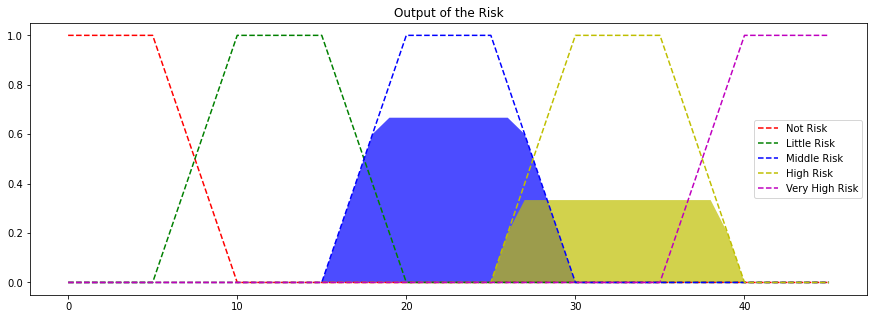

In [27]:
risk0 = np.zeros_like(y_risk)

fig = plt.subplots(figsize=(15, 5))

plt.fill_between(y_risk, risk0, out_not, facecolor = 'r', alpha = 0.7) # plot warna
plt.plot(y_risk, risk_not, 'r', linestyle = '--', label='Not Risk') # plot garis

plt.fill_between(y_risk, risk0, out_little, facecolor = 'g', alpha = 0.7)
plt.plot(y_risk, risk_little, 'g', linestyle = '--', label='Little Risk')

plt.fill_between(y_risk, risk0, out_mid, facecolor = 'b', alpha = 0.7)
plt.plot(y_risk, risk_mid, 'b', linestyle = '--', label='Middle Risk')

plt.fill_between(y_risk, risk0, out_high, facecolor = 'y', alpha = 0.7)
plt.plot(y_risk, risk_high, 'y', linestyle = '--', label='High Risk')

plt.fill_between(y_risk, risk0, out_very_high, facecolor = 'm', alpha = 0.7)
plt.plot(y_risk, risk_very_high, 'm', linestyle = '--', label='Very High Risk')

plt.title('Output of the Risk')

plt.legend()

### **Defuzzification**

Hitung tingkat resiko dari resiko yang sudah diperoleh dari proses **_inference_**.

In [28]:
out_risk = np.fmax(np.fmax(np.fmax(np.fmax(out_not, out_little), out_mid), out_high), out_very_high)

defuzzified  = fuzz.defuzz(y_risk, out_risk, 'centroid')

result = fuzz.interp_membership(y_risk, out_risk, defuzzified)

print("Coroner Heart Diagnosis:", defuzzified)

Coroner Heart Diagnosis: 25.993975903614444


#### Plotting Risk II

Plot hasil inferensi tergolong ke resiko yang mana saja dan berapa tingkat kemungkinannya (diperoleh dari **_defuzzification_**).

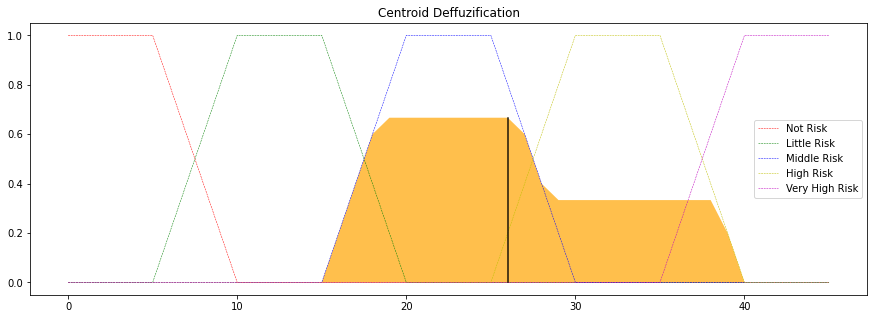

In [29]:
fig = plt.subplots(figsize=(15, 5))

plt.plot(y_risk, risk_not, 'r', linewidth = 0.5, linestyle = '--', label='Not Risk')
plt.plot(y_risk, risk_little, 'g', linewidth = 0.5, linestyle = '--', label='Little Risk')
plt.plot(y_risk, risk_mid, 'b', linewidth = 0.5, linestyle = '--', label='Middle Risk')
plt.plot(y_risk, risk_high, 'y', linewidth = 0.5, linestyle = '--', label='High Risk')
plt.plot(y_risk, risk_very_high, 'm', linewidth = 0.5, linestyle = '--', label='Very High Risk')

plt.fill_between(y_risk, risk0, out_risk, facecolor = 'Orange', alpha = 0.7)
plt.plot([defuzzified , defuzzified], [0, result], 'k', linewidth = 1.5, alpha = 0.9)

plt.title('Centroid Deffuzification')
plt.legend()

### Tugas

Konversikan program dari jupyter notebook berikut menjadi sebuah program python dengan nama `mamdani_disease_diagnosis.py`. Program ini dapat menerima masukan berupa data dari terminal kemudian memprosesnya dan menampilkan hasilnnya!

Input → Process → Output

### Bonus

Pelajari konsep dari Fuzzy logic dari penjelasan saya, lalu kerjakan kasus di atas dengan menggunakan metode Fuzzy `Tsukamoto`, kerjakan dalam jupyter-notebook dan beri nama `tsukamoto_disease_diagnosis.ipynb` dan simpan dalam folder `fuzzy-logic`!

**Note:** Semua tugas tolong di simpan dalam folder `fuzzy-logic` dan push ke GitHub!